In [172]:
import pandas as pd
import patsy

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#### Attribute Information:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [208]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Could be a typical function for classifying:

def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4444)
#     ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred,labels=[1,0])
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=[1,0])
    
    plt.figure()
    plot_confusion_matrix(cm)

In [113]:
df = pd.read_csv('./data/mushrooms.csv')
df.head(30)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [115]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [122]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [210]:
# cols_to_transform = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
#        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
#        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
#        'stalk-surface-below-ring', 'stalk-color-above-ring',
#        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
#        'ring-type', 'spore-print-color', 'population', 'habitat']

# cols_to_transform = df.columns

cols_to_transform = ['class', 'cap-color','cap-shape']

df_with_dummies = pd.get_dummies(data=df[cols_to_transform], columns=cols_to_transform )
df_with_dummies.head(2)

,class_e,class_p,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [200]:
y.sum()

3916

In [211]:
X = df_with_dummies.iloc[:,2:]
y = df_with_dummies.iloc[:,1]

Training Data Accuracy: 0.62
Test Data Accuracy:     0.62
[[586 578]
 [343 931]]


Precision:              0.63
Recall:                 0.50


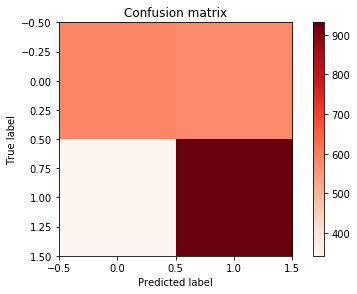

In [212]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
train_score(lgr,X,y)

Training Data Accuracy: 1.00
Test Data Accuracy:     1.00
[[1274    0]
 [   0 1164]]


Precision:              1.00
Recall:                 1.00


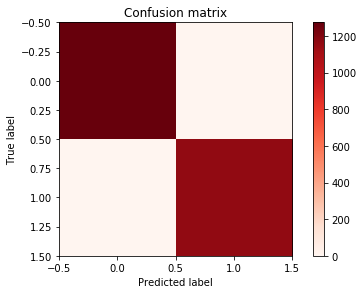

In [191]:
dt = DecisionTreeClassifier(max_depth=7)
train_score(dt,X,y)

Training Data Accuracy: 0.64
Test Data Accuracy:     0.65
[[1149  125]
 [ 731  433]]


Precision:              0.61
Recall:                 0.90


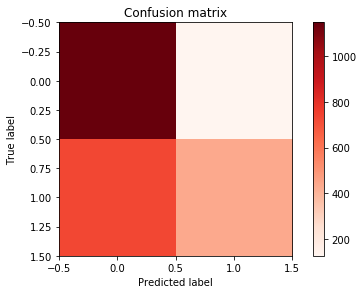

In [186]:
rf = RandomForestClassifier(max_depth=8)
train_score(rf,X,y)

1 0.627973748975
2 0.598851517637
3 0.646431501231
4 0.614848236259
5 0.629614438064
6 0.614438063987
7 0.612387202625
8 0.614438063987
9 0.612387202625
10 0.609515996719
11 0.62715340443
12 0.624282198523
13 0.62715340443
14 0.609515996719
15 0.62715340443
16 0.641919606235
17 0.625922887613
18 0.62715340443
19 0.624282198523
20 0.628383921247
Training Data Accuracy: 0.61
Test Data Accuracy:     0.61
[[852 422]
 [530 634]]


Precision:              0.62
Recall:                 0.67


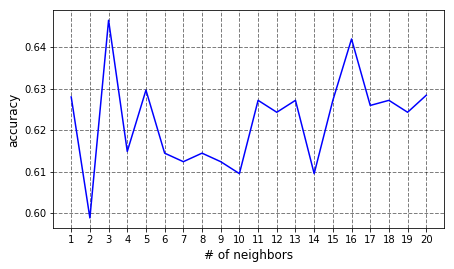

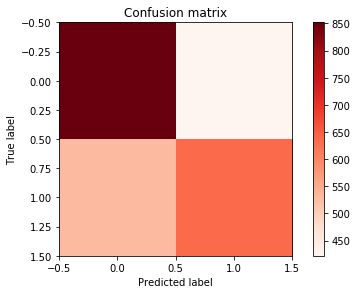

In [187]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=4444)
scores = []
nb_num = range(1,21)
for k in nb_num:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    print(k,accuracy_score(y_test, y_pred))


fig,ax = plt.subplots(1,1,figsize=(7,4));
ax.plot(nb_num,scores,'b')
ax.set_xticks(nb_num);
ax.grid(color='k', linestyle='--', linewidth=1, alpha=0.5)
ax.set_xlabel('# of neighbors',fontsize=12);
ax.set_ylabel('accuracy',fontsize=12);

knn = KNeighborsClassifier(n_neighbors=10)
train_score(knn,X,y)

### Change categorical feature to numerical: "cap_shape"
#### cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 


In [19]:
X=patsy.dmatrix('cap_shape',data=df,return_type='dataframe')
X.head(1)

,Intercept,cap_shape[T.c],cap_shape[T.f],cap_shape[T.k],cap_shape[T.s],cap_shape[T.x]
0,1.0,0.0,0.0,0.0,0.0,1.0


In [20]:
X.columns = ['cap_shape_bell_intercept',
             'cap_shape_conical',
             'cap_shape_flat',
             'cap_shape_knobbed',
             'cap_shape_sunken',
             'cap_shape_convex']
X_CapShape = X
X_CapShape.head(1)

,cap_shape_bell_intercept,cap_shape_conical,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_shape_convex
0,1.0,0.0,0.0,0.0,0.0,1.0


### Change categorical feature to numerical: "cap_surface"
#### cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 


### Change categorical feature to numerical: "cap_color"
#### cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 


In [17]:
X=patsy.dmatrix('cap_color',data=df,return_type='dataframe')
X.head(1)

,Intercept,cap_color[T.c],cap_color[T.e],cap_color[T.g],cap_color[T.n],cap_color[T.p],cap_color[T.r],cap_color[T.u],cap_color[T.w],cap_color[T.y]
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X.columns = ['cap_color_buff',
             'cap_color_cinnamon',
             'cap_color_red',
             'cap_color_gray',
             'cap_color_brown',
             'cap_color_pink',
             'cap_color_green',
             'cap_color_purple',
             'cap_color_white',
             'cap_color_yellow']
X_CapColor = X
X_CapColor.head(1)

,cap_color_buff,cap_color_cinnamon,cap_color_red,cap_color_gray,cap_color_brown,cap_color_pink,cap_color_green,cap_color_purple,cap_color_white,cap_color_yellow
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Change categorical feature to numerical: "bruises"
#### bruises?: bruises=t,no=f 


### Change categorical feature to numerical: "odor"
#### odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 


### Change categorical feature to numerical: "gill_attachment"
#### gill-attachment: attached=a,descending=d,free=f,notched=n 


### Change categorical feature to numerical: "gill_spacing"
#### gill-spacing: close=c,crowded=w,distant=d 


### Change categorical feature to numerical: "gill_size"
#### gill-size: broad=b,narrow=n 


### Change categorical feature to numerical: "gill_color"
#### gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 


### Change categorical feature to numerical: "stalk_shape"
#### stalk-shape: enlarging=e,tapering=t 


### Change categorical feature to numerical: "stalk_root"
#### stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 


### Change categorical feature to numerical: "stalk_surface_above_ring"
#### stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 


### Change categorical feature to numerical: "stalk_surface_below_ring"
#### stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 


### Change categorical feature to numerical: "stalk_color_above_ring"
#### stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 


### Change categorical feature to numerical: "stalk_color_below_ring"
#### stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 


### Change categorical feature to numerical: "veil_type"
#### veil-type: partial=p,universal=u 


In [10]:
df.columns = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat']

### Change categorical feature to numerical: "veil_color"
#### veil-color: brown=n,orange=o,white=w,yellow=y 


### Change categorical feature to numerical: "ring_number"
#### ring-number: none=n,one=o,two=t 


### Change categorical feature to numerical: "ring_type"
#### ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 


### Change categorical feature to numerical: "spore_print_color"
#### spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 


### Change categorical feature to numerical: "population"
#### population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 


### Change categorical feature to numerical: "habitat"
#### habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d